In [1]:
import csv
import numpy as np
import scipy.stats as ss
import scipy.optimize as so
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial import distance

In [2]:
cRelFluor = []
with open('scale_spl cRel-TT APC_Pure Bcells.csv', mode = 'r') as file:
    data = csv.reader(file)
    lineno = 0
    for lines in data:
        lineno += 1
        val = (lines[0])
        if (lineno > 1):
            if (float(val) > 200):
                cRelFluor.append(float(val))

In [3]:
IkBeKOFluor = []
with open('scale_spl IkBe-KO cRel-TT APC_Pure Bcells.csv', mode = 'r') as file:
    data = csv.reader(file)
    lineno = 0
    for lines in data:
        lineno += 1
        val = (lines[0])
        if (lineno > 1):
            if (float(val) > 200):
                IkBeKOFluor.append(float(val))

In [4]:
cRelFluor_Sim = []
with open('WTcRel.csv', mode = 'r') as file:
    data = csv.reader(file)
    lineno = 0
    for lines in data:
        lineno += 1
        val = (lines[0])
        if (lineno > 1):
            cRelFluor_Sim.append(float(val))

In [5]:
IkBeKOFluor_Sim = []
with open('KOcRel.csv', mode = 'r') as file:
    data = csv.reader(file)
    lineno = 0
    for lines in data:
        lineno += 1
        val = (lines[0])
        if (lineno > 1):
            IkBeKOFluor_Sim.append(float(val))

In [6]:
cRelMean = np.mean(cRelFluor)
IkBeKOMean = np.mean(IkBeKOFluor)
cRelVar = ss.variation(cRelFluor)
IkBeKOVar = ss.variation(IkBeKOFluor)
cRelSkew = ss.skew(np.log(cRelFluor))
IkBeKOSkew = ss.skew(np.log(IkBeKOFluor))
cRelKurt = ss.kurtosis(np.log(cRelFluor))
IkBeKOKurt = ss.kurtosis(np.log(IkBeKOFluor))
print("WT statistics - ")
print("Mean = ", cRelMean, " ; CV = ", cRelVar, " ; Skew = ", cRelSkew, " ; Kurtosis = ", cRelKurt)
print("IkBeKO statistics - ")
print("Mean = ", IkBeKOMean, " ; CV = ", IkBeKOVar, " ; Skew = ", IkBeKOSkew, " ; Kurtosis = ", IkBeKOKurt)

WT statistics - 
Mean =  4114.14573079578  ; CV =  0.3629227577747682  ; Skew =  -0.23630829508691076  ; Kurtosis =  3.2609847004668344
IkBeKO statistics - 
Mean =  4314.843313707952  ; CV =  0.3578605090179988  ; Skew =  -0.334646887413163  ; Kurtosis =  2.635142289459985


<AxesSubplot:ylabel='Density'>

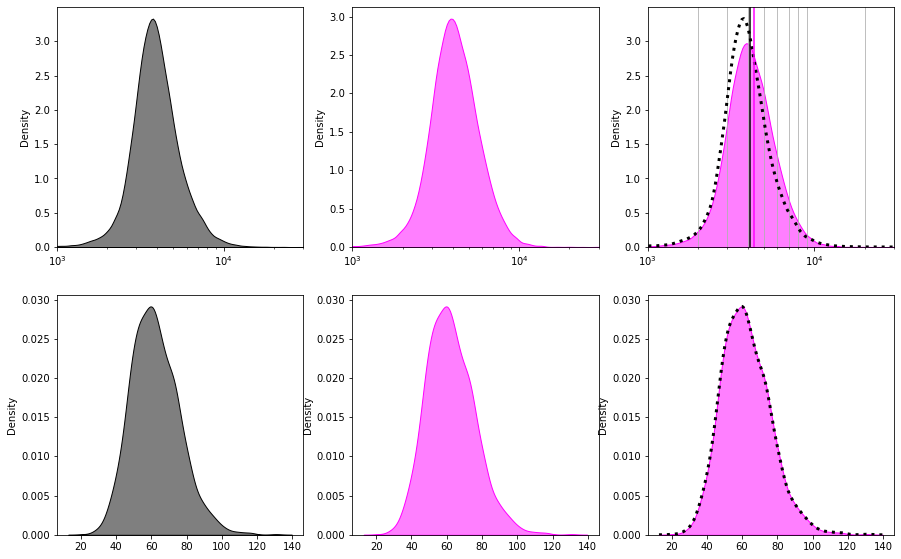

In [31]:
plt.figure(figsize=(15,15))
# Raw data
plt.subplot(331)
sns.kdeplot(cRelFluor, color='black', alpha=0.5, fill=True, log_scale = True)
plt.gca().set_xlim((1000, 30000))
plt.subplot(332)
sns.kdeplot(IkBeKOFluor, color='magenta', alpha=0.5, fill=True, log_scale = True)
plt.gca().set_xlim((1000, 30000))
plt.subplot(333)
sns.kdeplot(cRelFluor, color='black', alpha=0.5, fill=False, linewidth = 3, linestyle = 'dotted', cumulative = False, log_scale = True)
sns.kdeplot(IkBeKOFluor, color='magenta', alpha=0.5, fill=True, cumulative = False, log_scale = True)
plt.gca().set_xlim((1000, 30000))
plt.gca().xaxis.grid(True, which='minor')
plt.gca().axvline(cRelMean, color='black')
plt.gca().axvline(IkBeKOMean, color='magenta')
# Cumulative raw data
# plt.subplot(334)
# sns.kdeplot(cRelFluor, color='black', alpha=0.5, fill=True, cumulative = True, log_scale = True)
# plt.gca().set_xlim((1000, 30000))
# plt.subplot(335)
# sns.kdeplot(IkBeKOFluor, color='magenta', alpha=0.5, fill=True, cumulative = True, log_scale = True)
# plt.gca().set_xlim((1000, 30000))
# plt.subplot(336)
# sns.kdeplot(cRelFluor, color='black', alpha=0.5, fill=False, linewidth = 3, linestyle = 'dotted', cumulative = True, log_scale = True)
# sns.kdeplot(IkBeKOFluor, color='magenta', alpha=0.5, fill=True, cumulative = True, log_scale = True)
# plt.gca().set_xlim((1000, 30000))
# plt.gca().xaxis.grid(True, which='minor')
# plt.gca().yaxis.grid(True, which='major')
# plt.gca().axvline(cRelMean, color='black')
# plt.gca().axvline(IkBeKOMean, color='magenta')
# Simulated data
plt.subplot(334)
sns.kdeplot(cRelFluor_Sim, color='black', alpha=0.5, fill=True)
plt.subplot(335)
sns.kdeplot(IkBeKOFluor_Sim, color='magenta', alpha=0.5, fill=True)
plt.subplot(336)
sns.kdeplot(cRelFluor_Sim, color='black', alpha=0.5, fill=False, linewidth = 3, linestyle = 'dotted', cumulative = False)
sns.kdeplot(IkBeKOFluor_Sim, color='magenta', alpha=0.5, fill=True, cumulative = False)

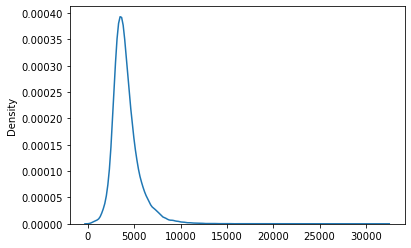

In [8]:
cRel_kde = sns.kdeplot(cRelFluor)
cRel_line = cRel_kde.lines[0]
cRel_x, cRel_y = cRel_line.get_data()

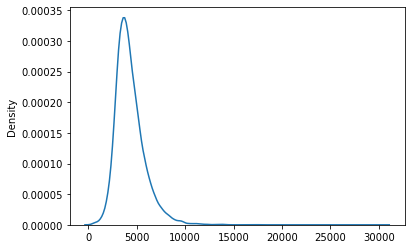

In [9]:
IkBeKO_kde = sns.kdeplot(IkBeKOFluor)
IkBeKO_line = IkBeKO_kde.lines[0]
IkBeKO_x, IkBeKO_y = IkBeKO_line.get_data()

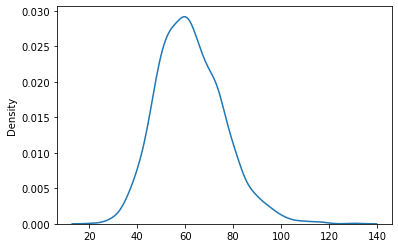

In [10]:
cRel_Sim_kde = sns.kdeplot(cRelFluor_Sim)
cRel_Sim_line = cRel_Sim_kde.lines[0]
cRel_Sim_x, cRel_Sim_y = cRel_Sim_line.get_data()

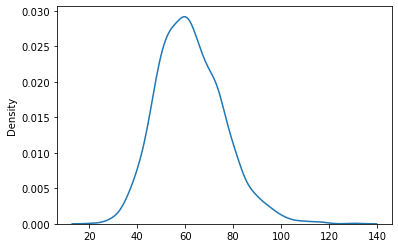

In [11]:
IkBeKO_Sim_kde = sns.kdeplot(IkBeKOFluor_Sim)
IkBeKO_Sim_line = IkBeKO_Sim_kde.lines[0]
IkBeKO_Sim_x, IkBeKO_Sim_y = IkBeKO_Sim_line.get_data()

JSD =  0.0767768337954035
cRel vs IkBeKO : Stat =  0.07909430372864656  & p =  7.166693346443109e-108  => Different


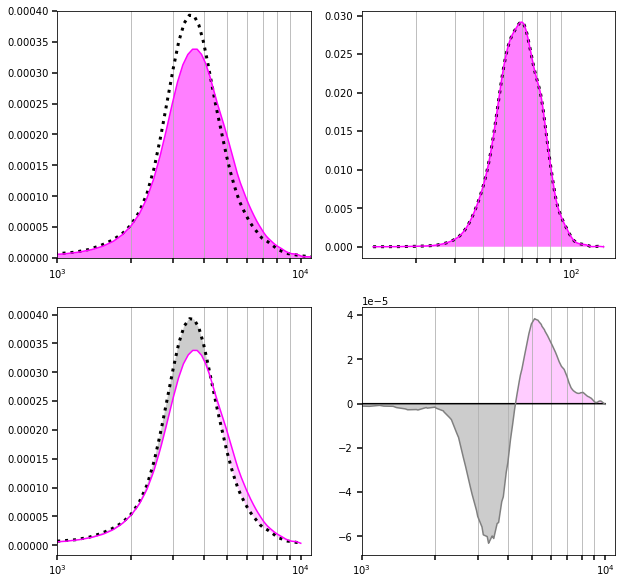

In [25]:
cRel_y_func = interp1d(cRel_x, cRel_y)
IkBeKO_y_func = interp1d(IkBeKO_x, IkBeKO_y)
common_x = np.linspace(1000, 10000, 90000)
cRel_y_interp = cRel_y_func(common_x)
IkBeKO_y_interp = IkBeKO_y_func(common_x)

jsd_cRel_IkBeKO_Raw = distance.jensenshannon(cRel_y_interp, IkBeKO_y_interp, base=2)
print("JSD = ", jsd_cRel_IkBeKO_Raw)

cRel_IkBeKO_Raw_stat, cRel_IkBeKO_Raw_p = ss.kstest(cRelFluor, IkBeKOFluor, alternative = 'two-sided')
print("cRel vs IkBeKO : Stat = ", cRel_IkBeKO_Raw_stat, " & p = ", cRel_IkBeKO_Raw_p, (" => Same" if cRel_IkBeKO_Raw_p > 0.05 else " => Different"))

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.semilogx(cRel_x, cRel_y, 'black', linewidth = 3, linestyle = 'dotted')
plt.semilogx(IkBeKO_x, IkBeKO_y, 'magenta')
plt.fill_between(IkBeKO_x, IkBeKO_y, 0, facecolor="magenta", alpha=0.5)
plt.gca().set_ylim(0, 0.0004)
plt.gca().set_xlim(1000, 11000)
plt.gca().xaxis.set_tick_params(which='both', width=1.5, length = 5)
plt.gca().yaxis.set_tick_params(which='both', width=1.5, length = 5)
plt.gca().xaxis.grid(True, which='minor')

plt.subplot(222)
plt.semilogx(cRel_Sim_x, cRel_Sim_y, 'black', linewidth = 3, linestyle = 'dotted')
plt.semilogx(IkBeKO_Sim_x, IkBeKO_Sim_y, 'magenta')
plt.fill_between(IkBeKO_Sim_x, IkBeKO_Sim_y, 0, facecolor="magenta", alpha=0.5)
#plt.gca().set_ylim(0, 0.0004)
#plt.gca().set_xlim(1000, 11000)
plt.gca().xaxis.set_tick_params(which='both', width=1.5, length = 5)
plt.gca().yaxis.set_tick_params(which='both', width=1.5, length = 5)
plt.gca().xaxis.grid(True, which='minor')

plt.subplot(223)
plt.semilogx(common_x, cRel_y_interp, 'black', linewidth = 3, linestyle = 'dotted')
plt.semilogx(common_x, IkBeKO_y_interp, 'magenta')
plt.fill_between(common_x, IkBeKO_y_interp, cRel_y_interp, where=(IkBeKO_y_interp > cRel_y_interp), facecolor="magenta", alpha=0.2)
plt.fill_between(common_x, IkBeKO_y_interp, cRel_y_interp, where=(IkBeKO_y_interp < cRel_y_interp), facecolor="black", alpha=0.2)
plt.gca().set_xlim(1000, 11000)
plt.gca().xaxis.set_tick_params(which='both', width=1.5, length = 5)
plt.gca().yaxis.set_tick_params(which='both', width=1.5, length = 5)
plt.gca().xaxis.grid(True, which='minor')

plt.subplot(224)
diff_y = (IkBeKO_y_interp - cRel_y_interp)
plt.semilogx(common_x, np.zeros_like(common_x), 'black')
plt.semilogx(common_x, diff_y, 'gray')
plt.fill_between(common_x, diff_y, 0, where=(diff_y > 0), facecolor="magenta", alpha=0.2)
plt.fill_between(common_x, 0, diff_y, where=(diff_y < 0), facecolor="black", alpha=0.2)
plt.gca().set_xlim(1000, 11000)
plt.gca().xaxis.set_tick_params(which='both', width=1.5, length = 5)
plt.gca().yaxis.set_tick_params(which='both', width=1.5, length = 5)
plt.gca().xaxis.grid(True, which='minor')